In [ ]:
#Importing all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the Excel File
data=pd.read_excel("/content/DS_Python_Assignment.xlsx")
df=pd.DataFrame(data)

In [ ]:
#Knowing the columns and rows
print(data.shape)

(10000, 117)


## **List down all the columns with missing values**

In [ ]:
# Finding columns with missing values
def missing_value(df):
    missing_values = data.isnull().sum()
    columns_with_missing_values = missing_values[missing_values > 0]
    print(columns_with_missing_values)
missing_value(df)

STATE                                                   59
TENURE_IN_MONTHS                                        66
CLOSESTSTOREDISTANCE                                  1545
AGE                                                   5945
INCOME                                                3259
LENGTH OF RESIDENCE                                   2872
NUMBER OF PERSONS IN LIVING UNIT                      2872
NUMBER OF ADULTS IN LIVING UNIT                       2872
MOSAIC                                                1868
CAPE: AGE: POP: MEDIAN AGE                            2872
CAPE: AGE: POP: % 0-17                                2872
CAPE: AGE: POP: % 18-99+                              2872
CAPE: AGE: POP: % 65-99+                              2872
CAPE: ETHNIC: POP: % WHITE ONLY                       2872
CAPE: ETHNIC: POP: % BLACK ONLY                       2872
CAPE: ETHNIC: POP: % ASIAN ONLY                       2872
CAPE: ETHNIC: POP: % HISPANIC                         28

## **Categorize the columns based upon their data type and print, for ex: print all the numeric variables and other data types as well**

In [ ]:
#Getting the info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, CUSTOMERID to MDAYSHOPPER_L4Y
dtypes: float64(49), int64(65), object(3)
memory usage: 8.9+ MB


#### From this above info,we can say that,float,object and int data types are there in the given dataset.


In [ ]:
# Categorizing columns by data type
def data_type(df):
    data_types = {
        'Float Columns': df.select_dtypes(include='float').columns.tolist(),
        'String Columns': df.select_dtypes(include='object').columns.tolist(),
        'int Columns': df.select_dtypes(include='int').columns.tolist()
        }
    for i in data_types:
        print(f"{i}:",data_types[i])

data_type(df)


Float Columns: ['TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'AGE', 'INCOME', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'CAPE: AGE: POP: MEDIAN AGE', 'CAPE: AGE: POP: % 0-17', 'CAPE: AGE: POP: % 18-99+', 'CAPE: AGE: POP: % 65-99+', 'CAPE: ETHNIC: POP: % WHITE ONLY', 'CAPE: ETHNIC: POP: % BLACK ONLY', 'CAPE: ETHNIC: POP: % ASIAN ONLY', 'CAPE: ETHNIC: POP: % HISPANIC', 'CAPE: DENSITY: PERSONS PER HH FOR POP IN HH', 'CAPE: HHSIZE: HH: AVERAGE HOUSEHOLD SIZE', 'CAPE: TYP: HH: % MARRIED COUPLE FAMILY', 'CAPE: CHILD: HH: % WITH PERSONS LT18', 'CAPE: CHILD: HH: % MARR COUPLE FAMW- PERSONS LT18', 'CAPE: CHILD: HH: % MARR COUPLE FAMW-O PERSONS LT18', 'CAPE: LANG: HH: % SPANISH SPEAKING', 'CAPE: EDUC: POP25+: MEDIAN EDUCATION ATTAINED', 'CAPE: HOMVAL: OOHU: MEDIAN HOME VALUE', 'CAPE: BUILT: HU: MEDIAN HOUSING UNIT AGE', 'CAPE: TENANCY: OCCHU: % OWNER OCCUPIED', 'CAPE: TENANCY: OCCHU: % RENTER OCCUPIED', 'CAPE: EDUC: ISPSA', 'CAPE: EDUC: ISPSA DE

## **List the columns with duplicates a) Remove them b) Print before and after**

In [ ]:
# Function to list columns with duplicate values
def list_columns_with_duplicates(df):
    columns_with_duplicates = []
    for col in df.columns:
        if df[col].duplicated().any():
            columns_with_duplicates.append(col)
    return columns_with_duplicates

# Print columns with duplicates
print("\nColumns with Duplicates:")
columns_with_duplicates = list_columns_with_duplicates(df)
print(columns_with_duplicates)

# Print shape of the DataFrame before removing duplicates
print("\nBefore removing the duplicates:")
print("\n")
print(df.columns)
print("Shape of the DataFrame:", df.shape)

# Remove duplicates permanently (in-place)
df.drop_duplicates(inplace=True)

# Print shape of the DataFrame after removing duplicates
print("\nAfter removing duplicates:")
print("\n")
print(df.columns)
print("Shape of the DataFrame:", df.shape)


Columns with Duplicates:
['STATE', 'LCPCOUNT', 'PRIVATELABELTENDERFLAG', 'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE', 'HS_DIPLOMA', 'SOME_COLLEGE', 'BACH_GRAD_DEG', 'LT_HS_DIPLOMA', 'MARRIED', 'MNGMNT_OFFICEADMIN', 'TECH_PROF', 'SALES_JOB', 'BLUE_COLLAR', 'FARMER', 'RETIRED', 'SFDU', 'MFDU', 'HOMEOWNER', 'INCOME', 'MAIL_RESP_MULTI', 'MAIL_RESP_SINGLE', 'LENGTH OF RESIDENCE', 'NUMBER OF PERSONS IN LIVING UNIT', 'NUMBER OF ADULTS IN LIVING UNIT', 'METRO', 'URBAN', 'MOR BANK: UPSCALE MERCHANDISE BUYER', 'MOR BANK: MALE MERCHANDISE BUYER', 'MOR BANK: FEMALE MERCHANDISE BUYER', 'MOR BANK: CRAFTS-HOBBY MERCHANDISE BUYER', 'MOR BANK: GARDENING-FARMING BUYER', 'MOR BANK: BOOK BUYER', 'MOR BANK: COLLECT-SPECIAL FOODS BUYER', 'MOR BANK: GIFTS AND GADGETS BUYER', 'MOR BANK: GENERAL MERCHANDISE BUYER', 'MOR BANK: FAMILY AND GENERAL MAGAZINE', 'MOR BANK: FEMALE ORIENTED MAGAZINE', 'MOR BANK: MALE SPORTS MAGAZINE', 'MOR BANK: RELIGIOUS MAGAZINE', 'MOR BANK: GARDENING-FARMING MAGAZIN

## **List the constant columns a) Remove them b) Print before and after**

In [ ]:
# Function to list constant columns
def list_constant_columns(df):
    constant_columns = []
    for col in df.columns:
        if df[col].nunique() == 1:  # If the column has only one unique value
            constant_columns.append(col)
    return constant_columns

# List constant columns before removing them
print("\nConstant Columns:")
constant_columns = list_constant_columns(df)
print(constant_columns)

# Print shape of the DataFrame before removing constant columns
print("\nBefore removing constant columns:")
print("\n")
print(df.columns)
print("\n")
print("Shape of the DataFrame:", df.shape)

# Remove constant columns
df.drop(columns=constant_columns, inplace=True)


# Print shape of the DataFrame after removing constant columns
print("\nAfter removing constant columns:")
print(df.columns)
print("\n")
print("Shape of the DataFrame:", df.shape)



Constant Columns:
['MARRIED', 'CHILDREN', '7-Cost Only Spend']

Before removing constant columns:


Index(['CUSTOMERID', 'STATE', 'LCPCOUNT', 'PRIVATELABELTENDERFLAG',
       'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE',
       'HS_DIPLOMA', 'SOME_COLLEGE',
       ...
       'MDAYREV_L3Y', 'MDAYREV_L4Y', 'MDAYQTY_L1Y', 'MDAYQTY_L2Y',
       'MDAYQTY_L3Y', 'MDAYQTY_L4Y', 'MDAYSHOPPER_L1Y', 'MDAYSHOPPER_L2Y',
       'MDAYSHOPPER_L3Y', 'MDAYSHOPPER_L4Y'],
      dtype='object', length=117)


Shape of the DataFrame: (10000, 117)

After removing constant columns:
Index(['CUSTOMERID', 'STATE', 'LCPCOUNT', 'PRIVATELABELTENDERFLAG',
       'TENURE_IN_MONTHS', 'CLOSESTSTOREDISTANCE', 'FEMALE', 'AGE',
       'HS_DIPLOMA', 'SOME_COLLEGE',
       ...
       'MDAYREV_L3Y', 'MDAYREV_L4Y', 'MDAYQTY_L1Y', 'MDAYQTY_L2Y',
       'MDAYQTY_L3Y', 'MDAYQTY_L4Y', 'MDAYSHOPPER_L1Y', 'MDAYSHOPPER_L2Y',
       'MDAYSHOPPER_L3Y', 'MDAYSHOPPER_L4Y'],
      dtype='object', length=114)


Shape of the

## **Create box plot to visualise the outliers of all the numeric columns**

In [ ]:
Numeric_columns=df.select_dtypes(include='int').columns.tolist()

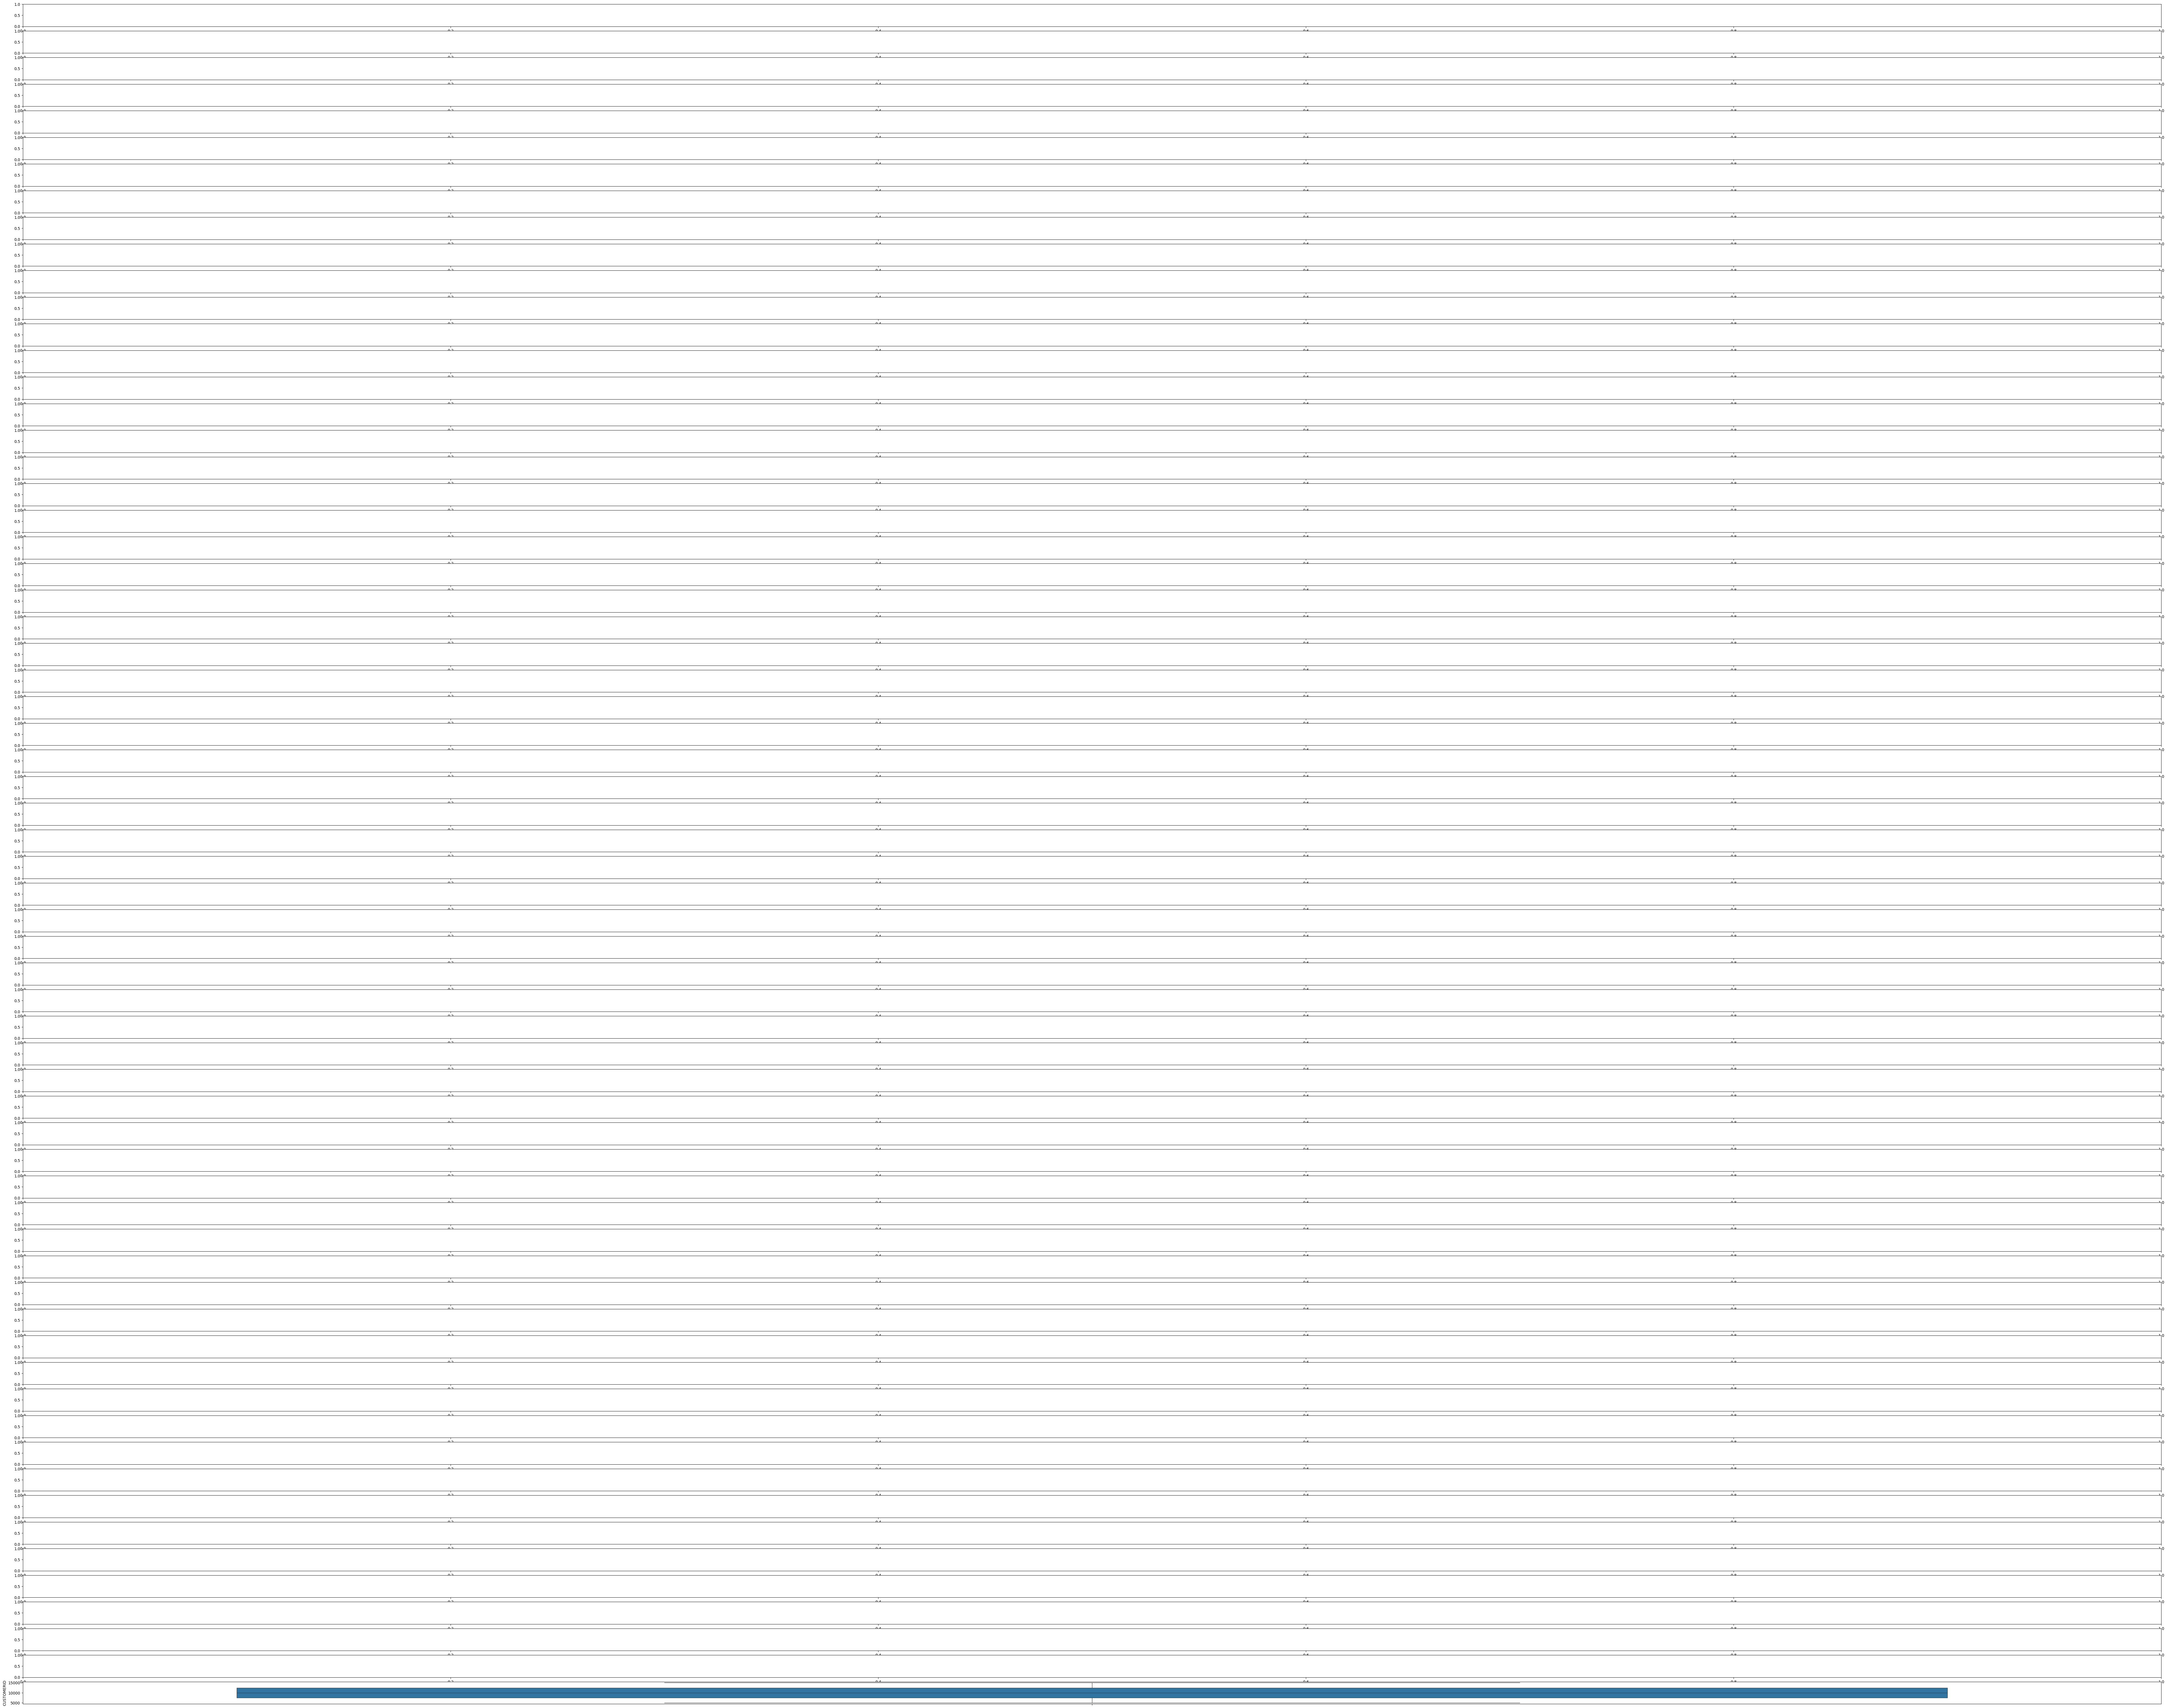

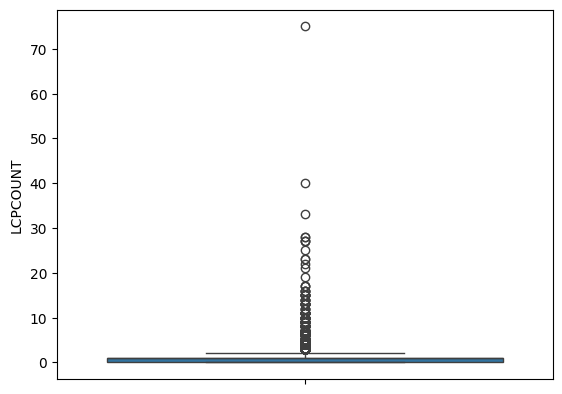

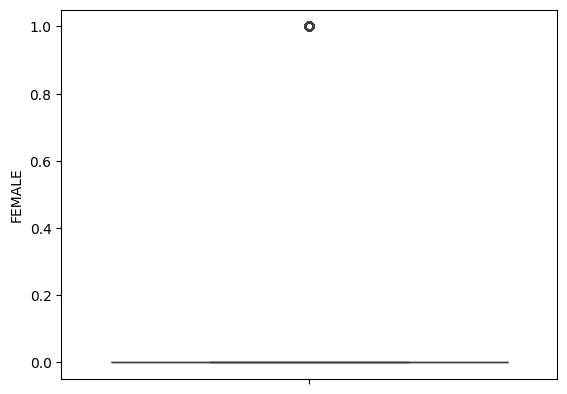

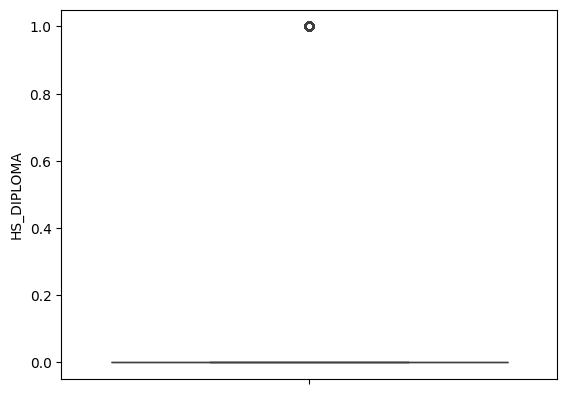

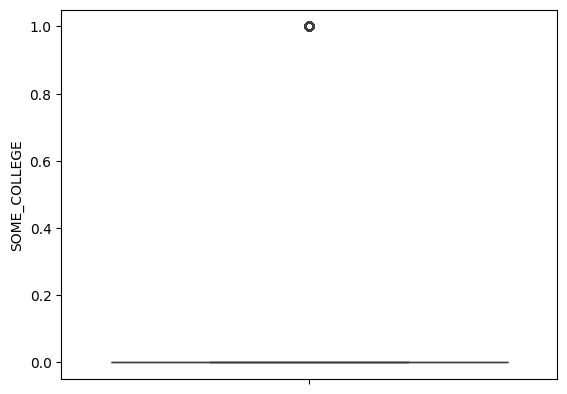

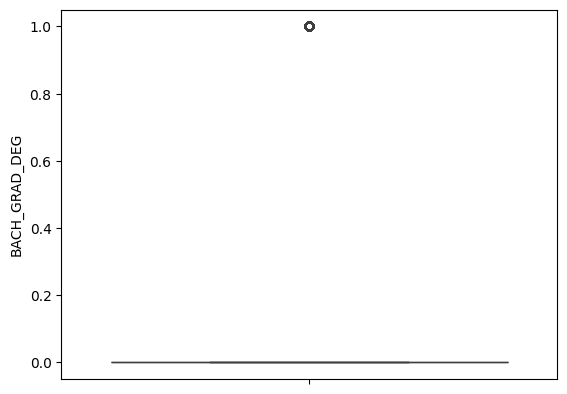

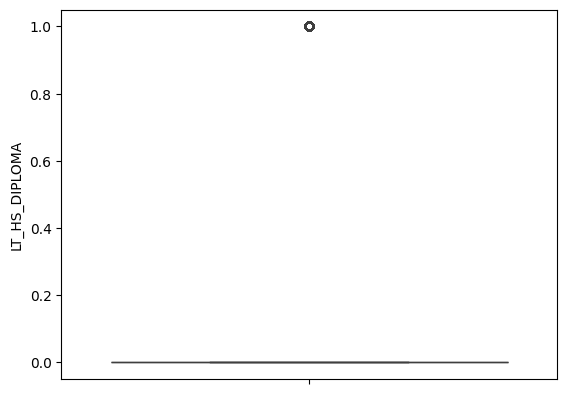

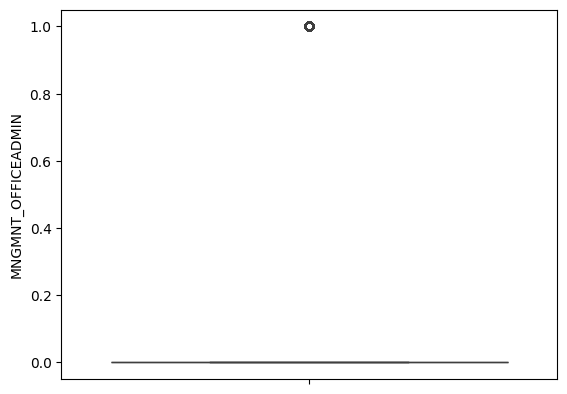

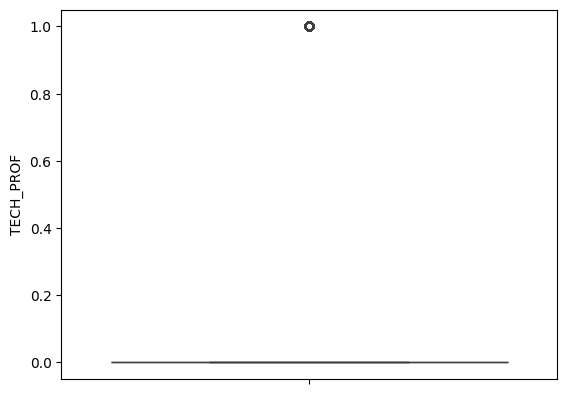

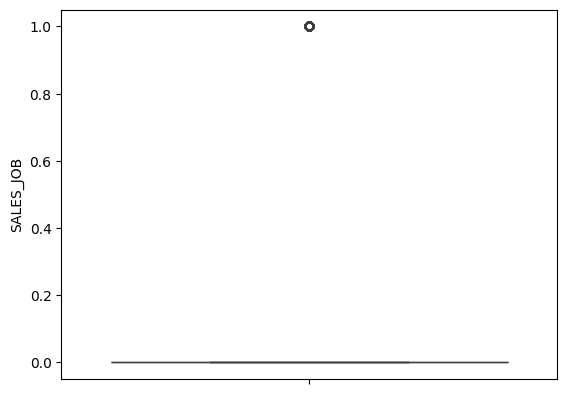

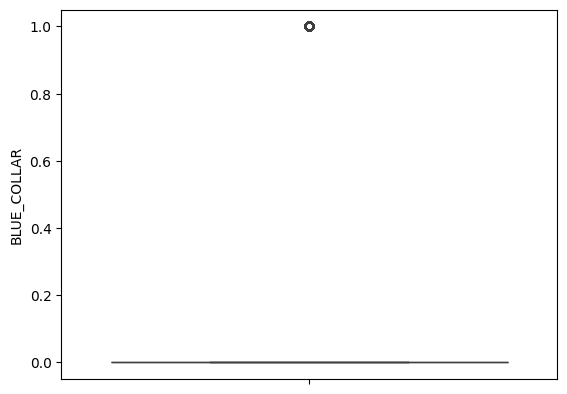

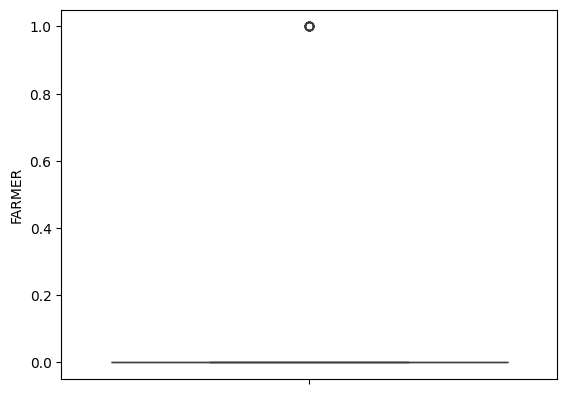

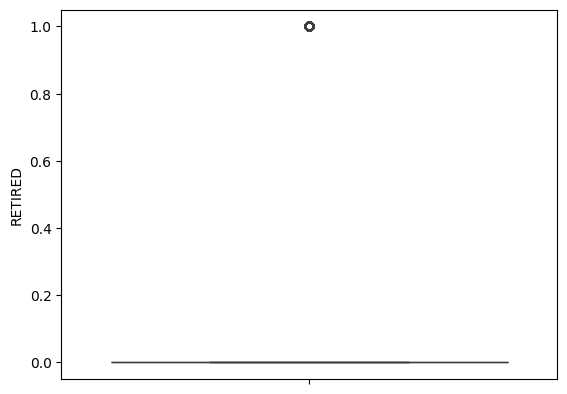

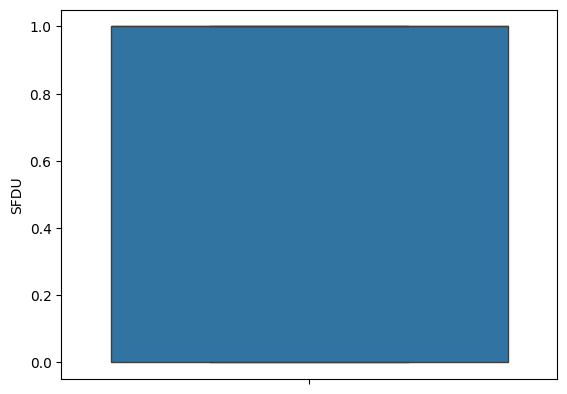

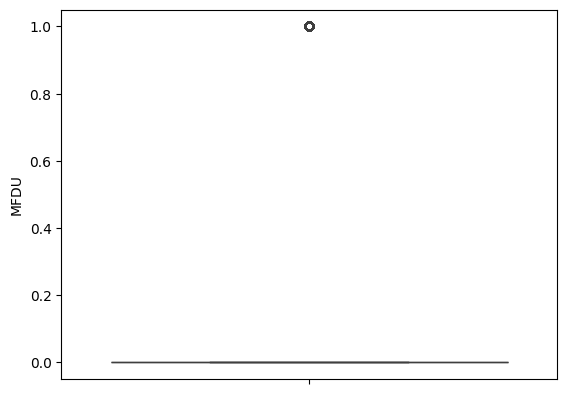

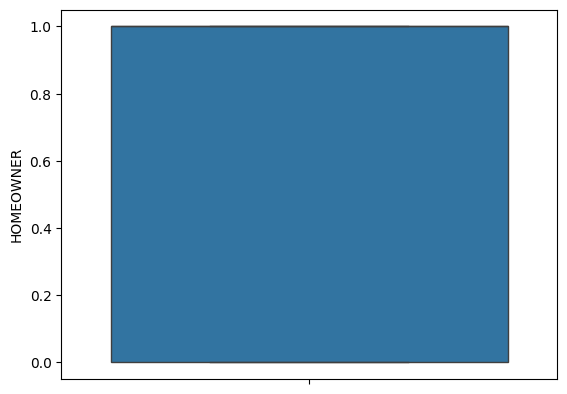

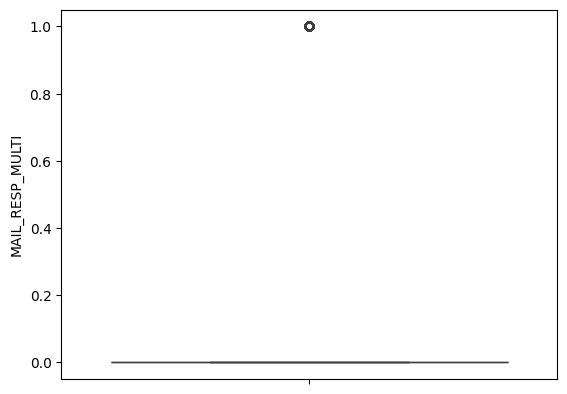

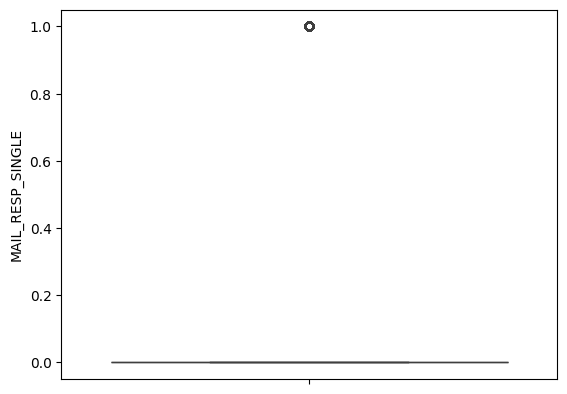

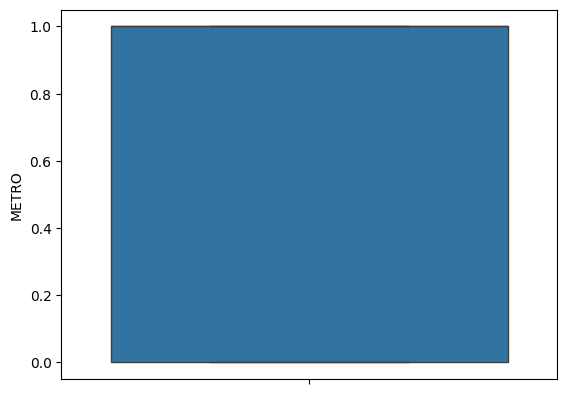

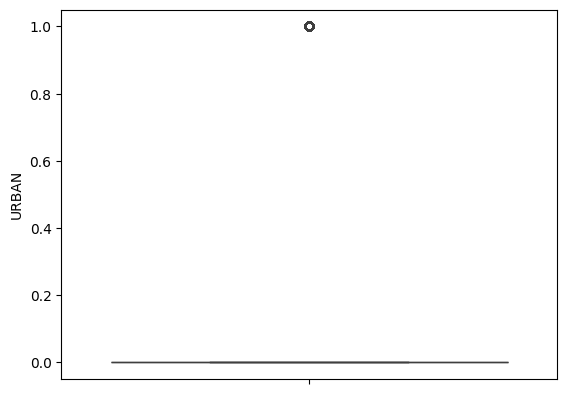

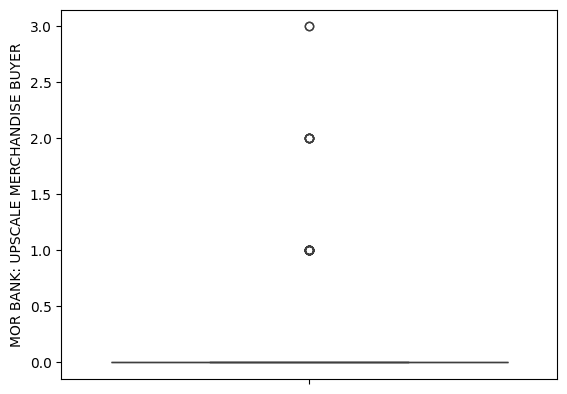

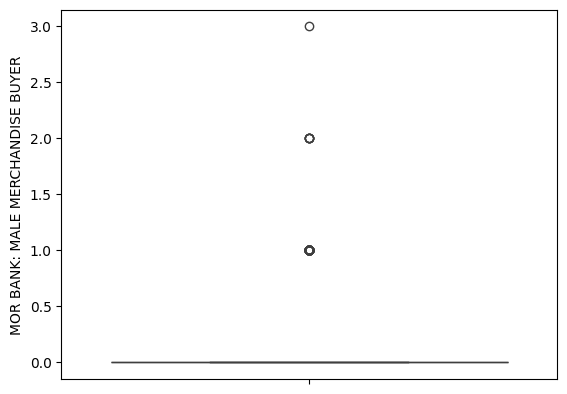

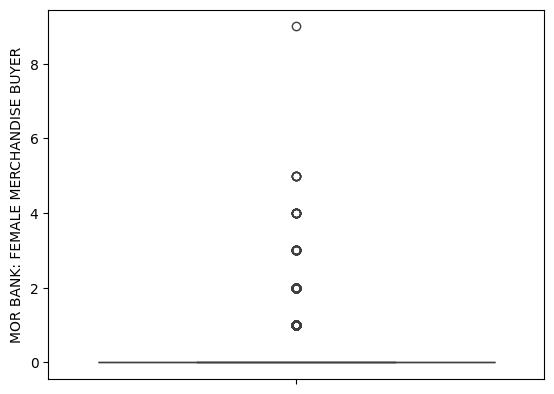

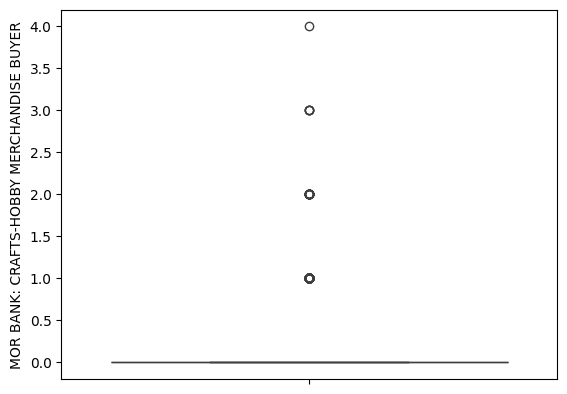

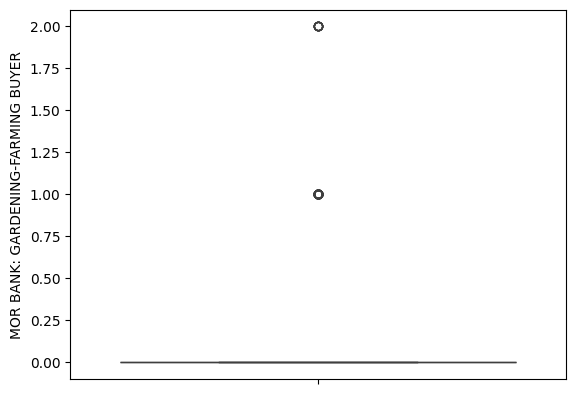

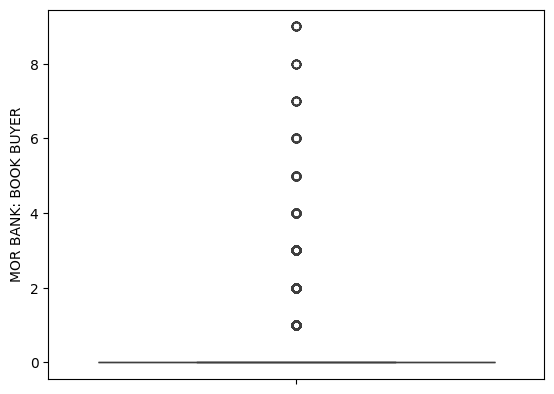

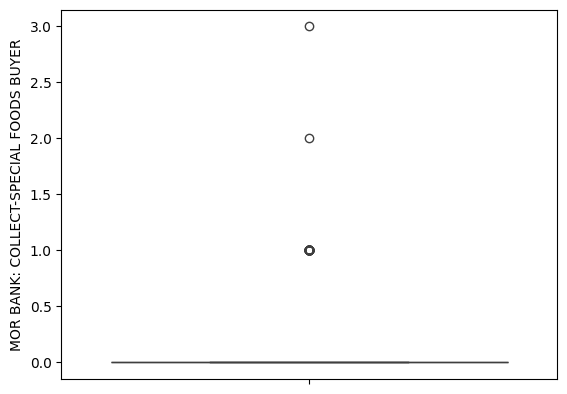

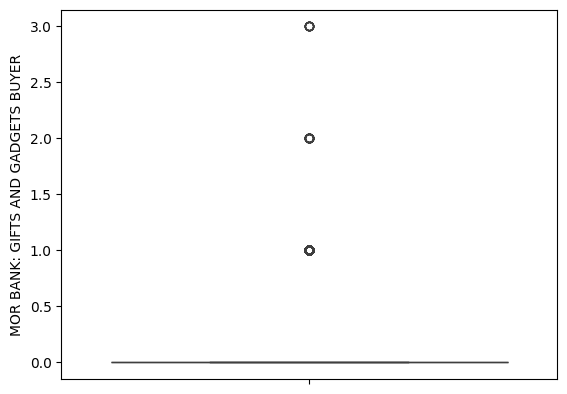

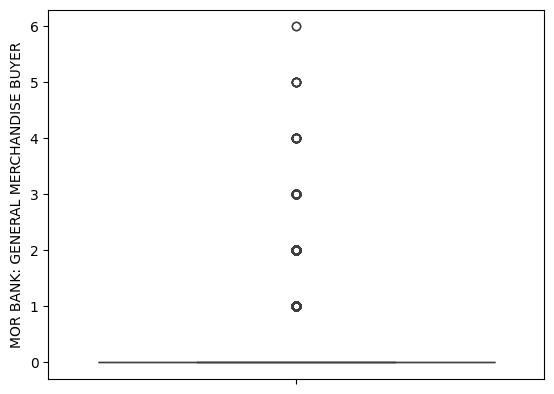

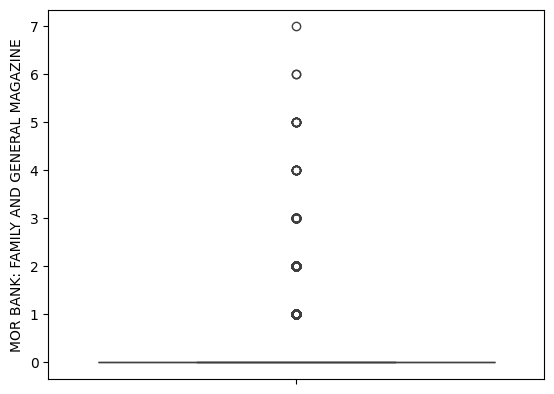

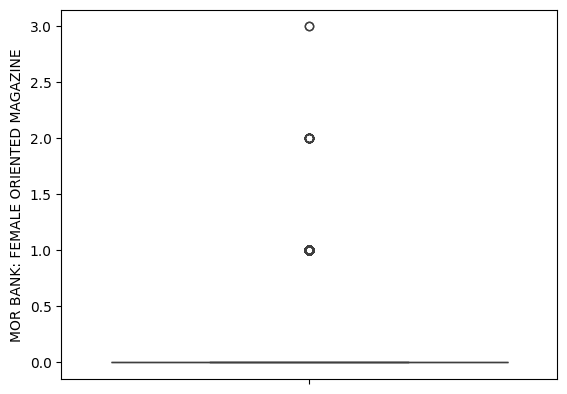

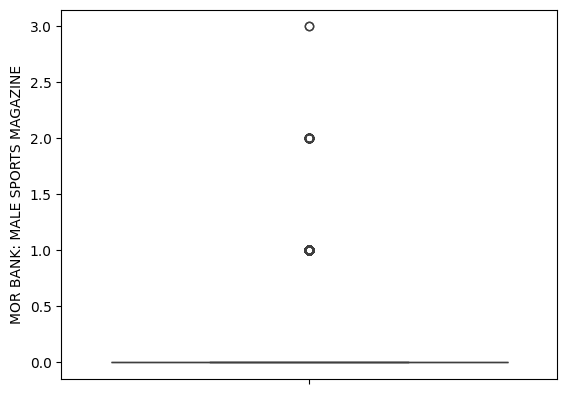

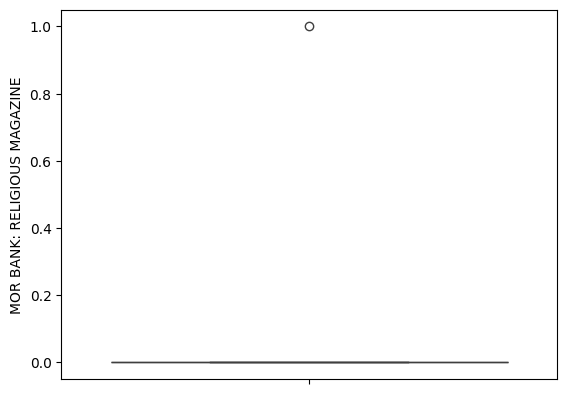

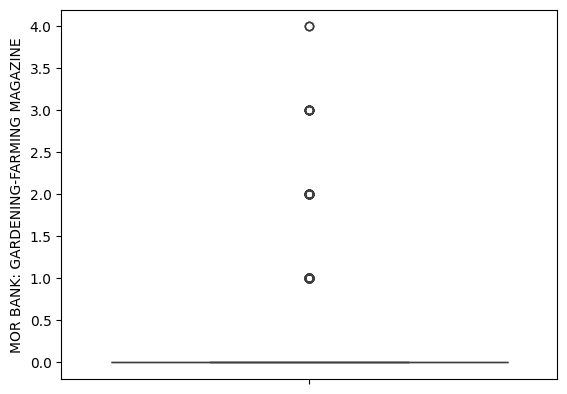

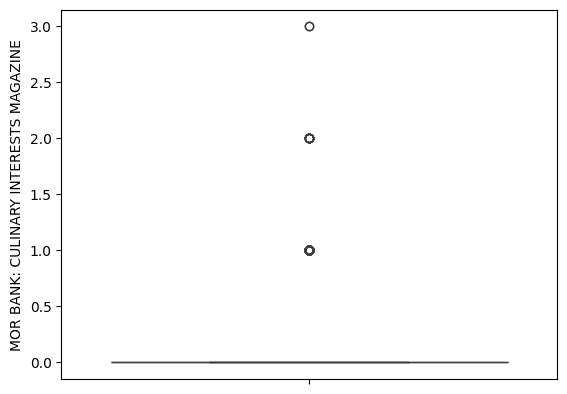

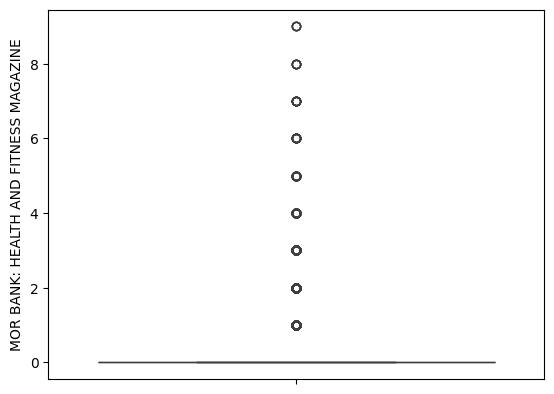

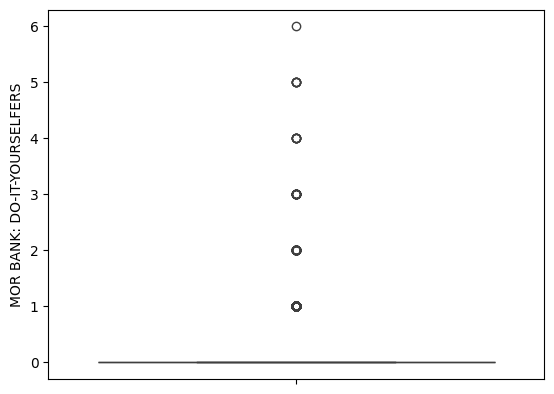

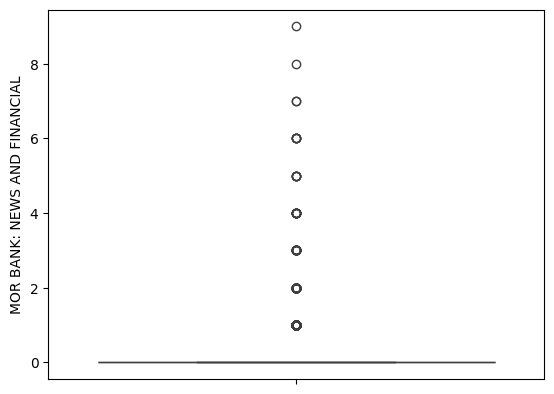

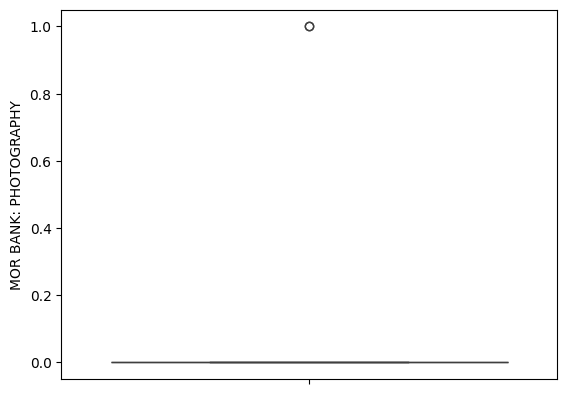

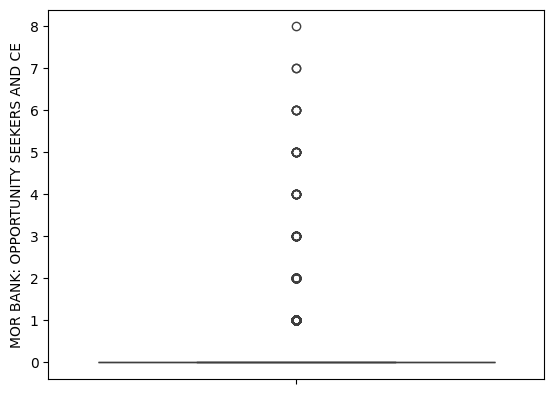

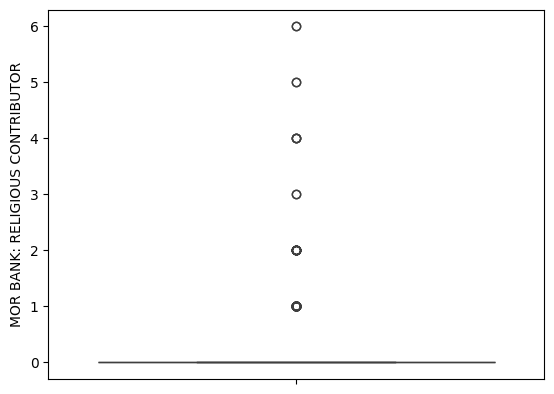

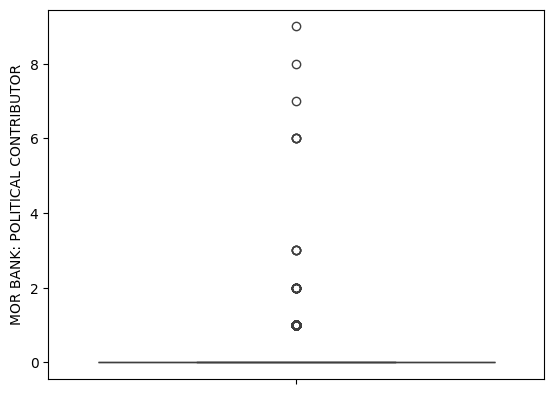

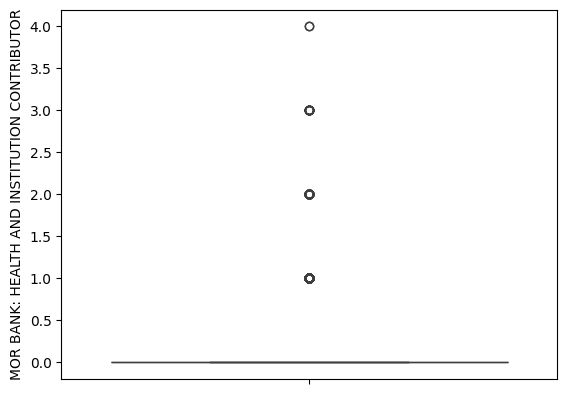

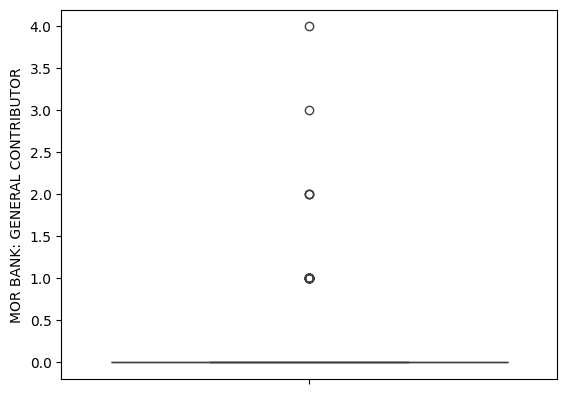

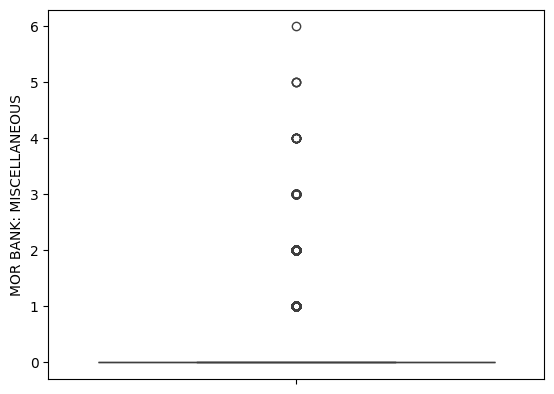

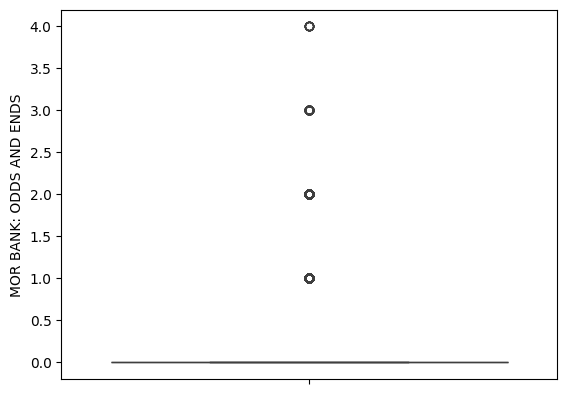

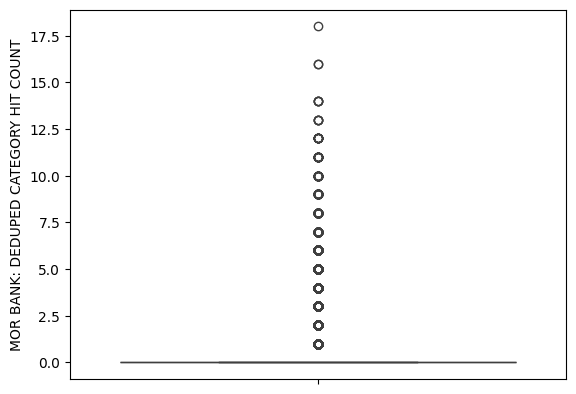

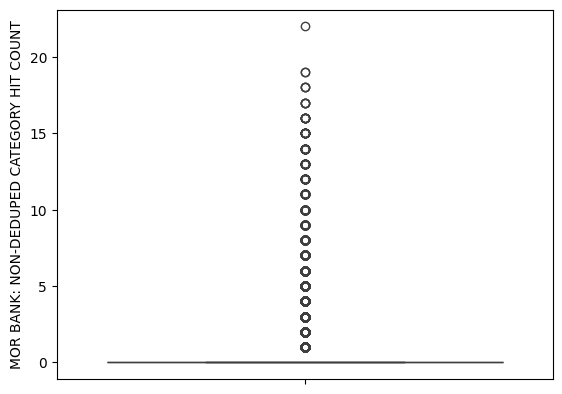

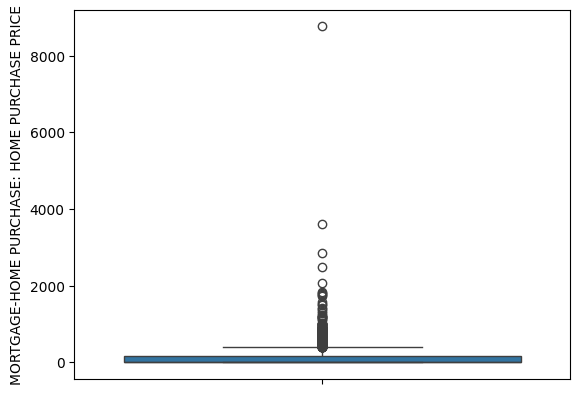

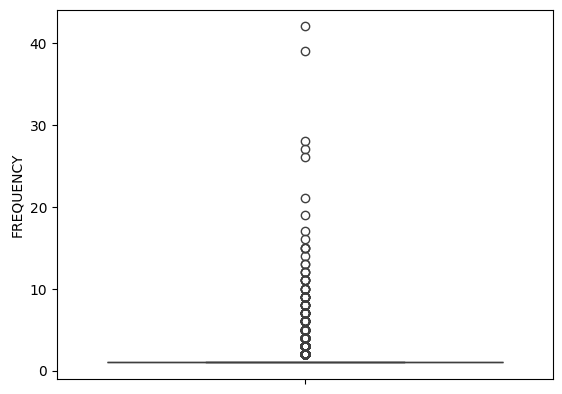

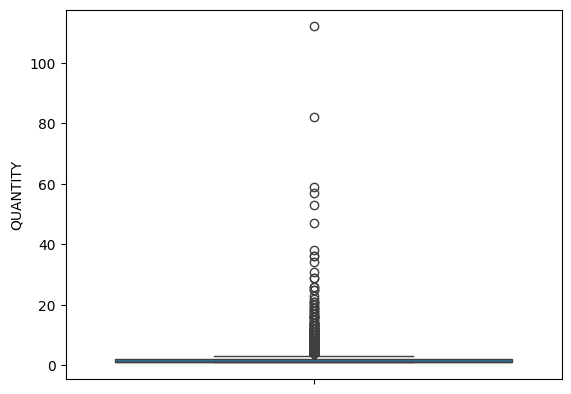

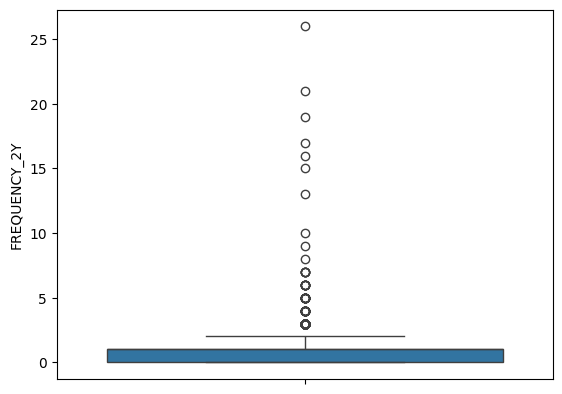

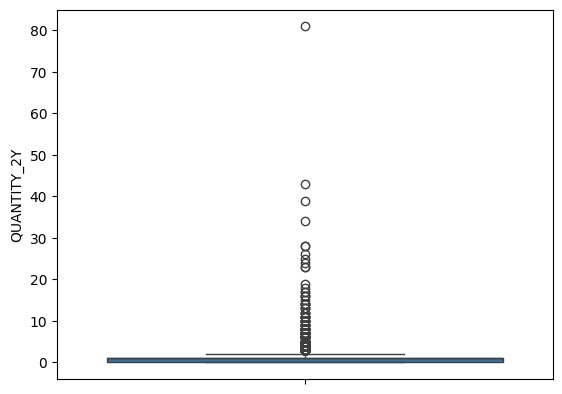

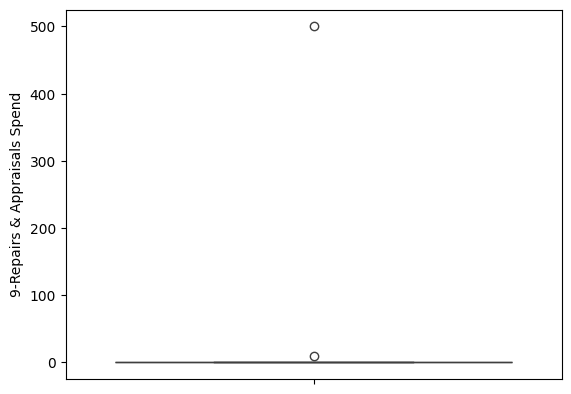

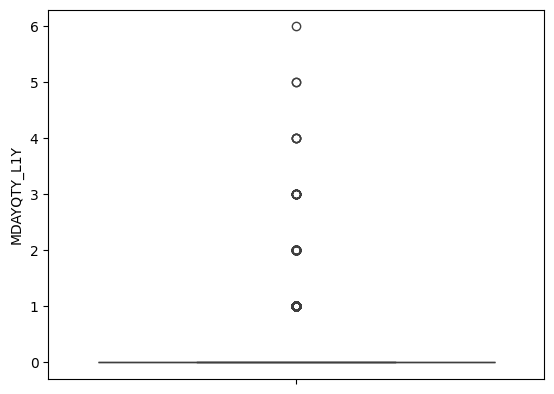

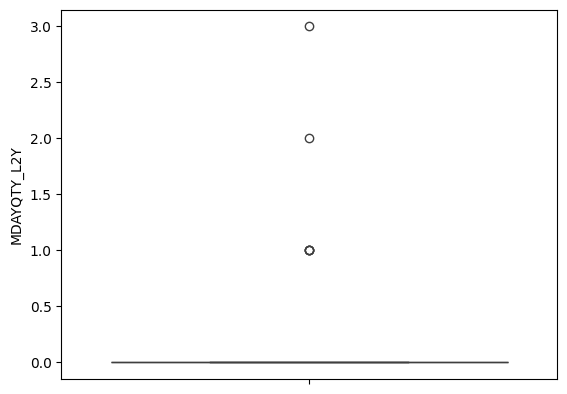

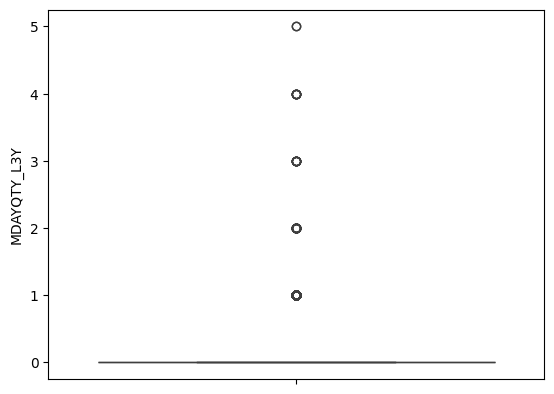

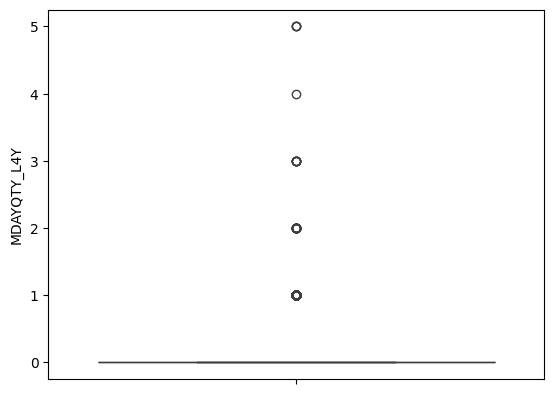

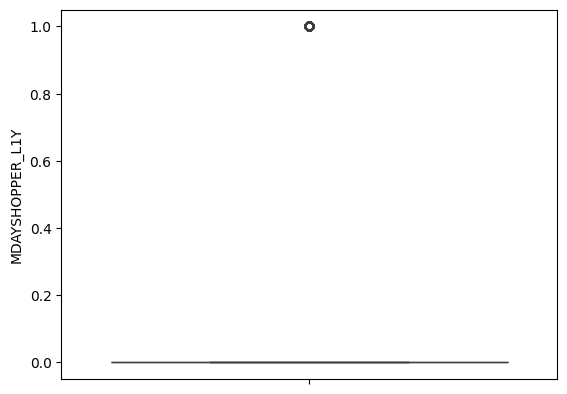

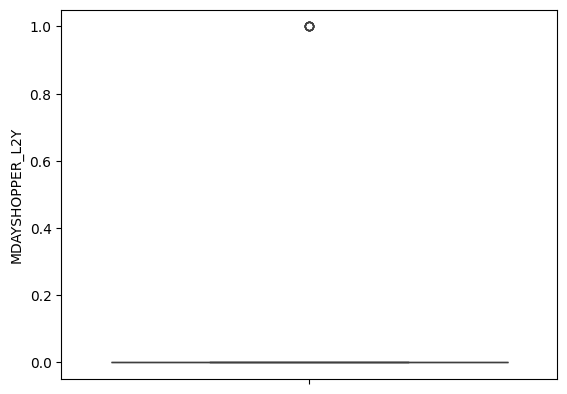

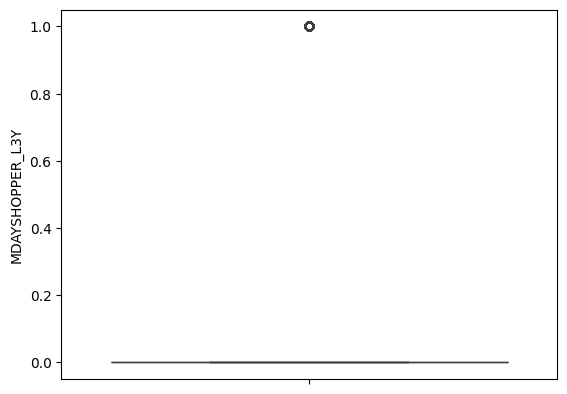

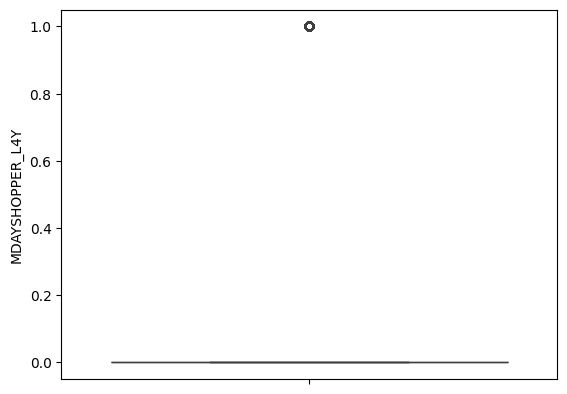

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the box plot for the numeric columns

# Create the figure and axes for subplots
fig= plt.subplots(64,1,figsize=(100,80))

# Loop through the numeric columns and plot the box plots
for col in Numeric_columns:
    sns.boxplot(data=df[col])  # Create boxplot for each column
    plt.show()

## **Create charts for any 6 columns and show their distribution**

**1.State Wise Count**

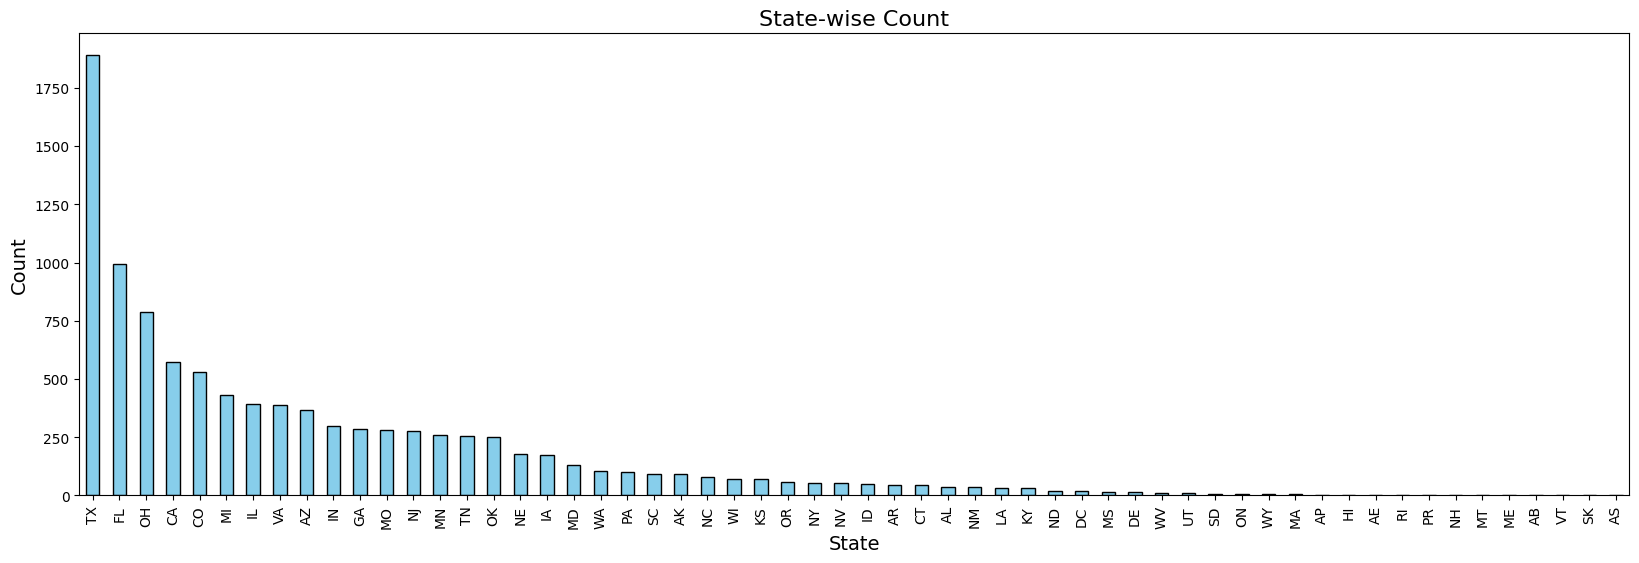

In [ ]:

# Count occurrences of each state
state_counts = df['STATE'].value_counts()

# Plot the bar graph for state counts
plt.figure(figsize=(20, 6))
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('State-wise Count', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

**2.Age Distribution**

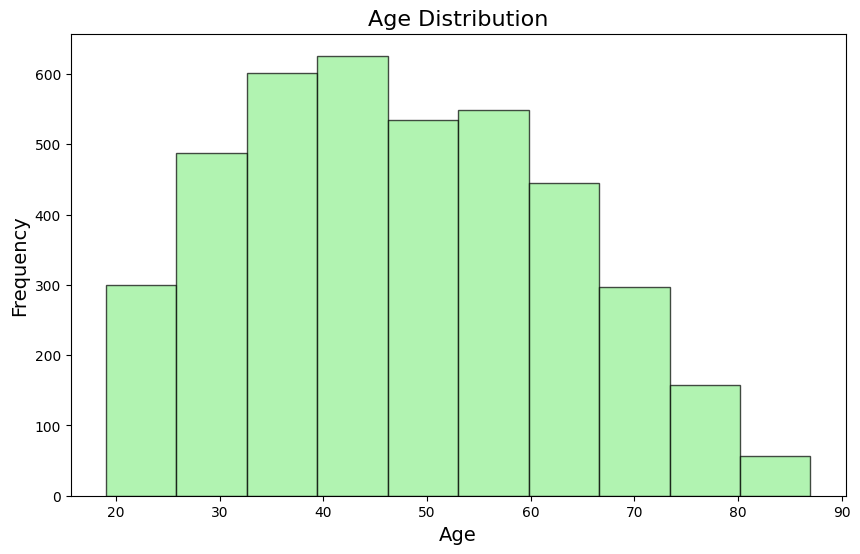

In [ ]:
# Plot the histogram for the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], color='lightgreen', edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

**3.Income Distribution**

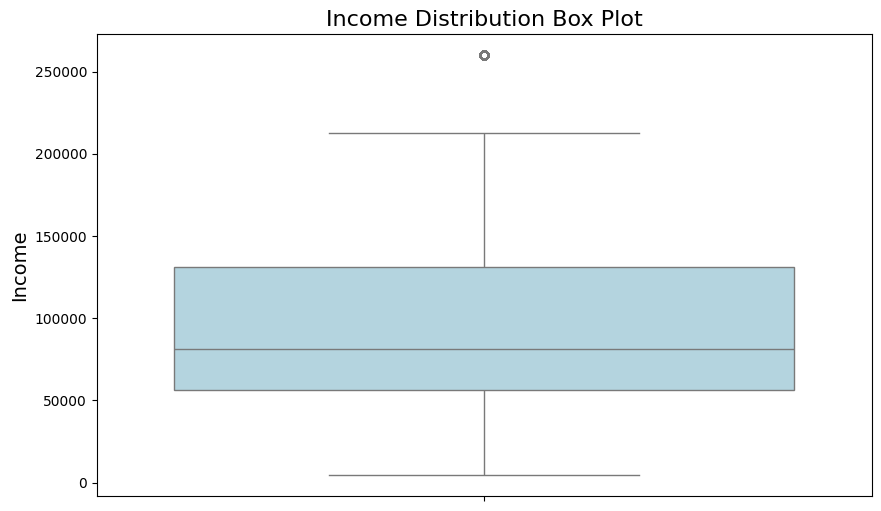

In [ ]:
# Create a box plot for the 'income' column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='INCOME', color='lightblue')

# Add a title and labels
plt.title('Income Distribution Box Plot', fontsize=16)
plt.ylabel('Income', fontsize=14)

# Show the plot
plt.show()

**4.Total Sales by State**

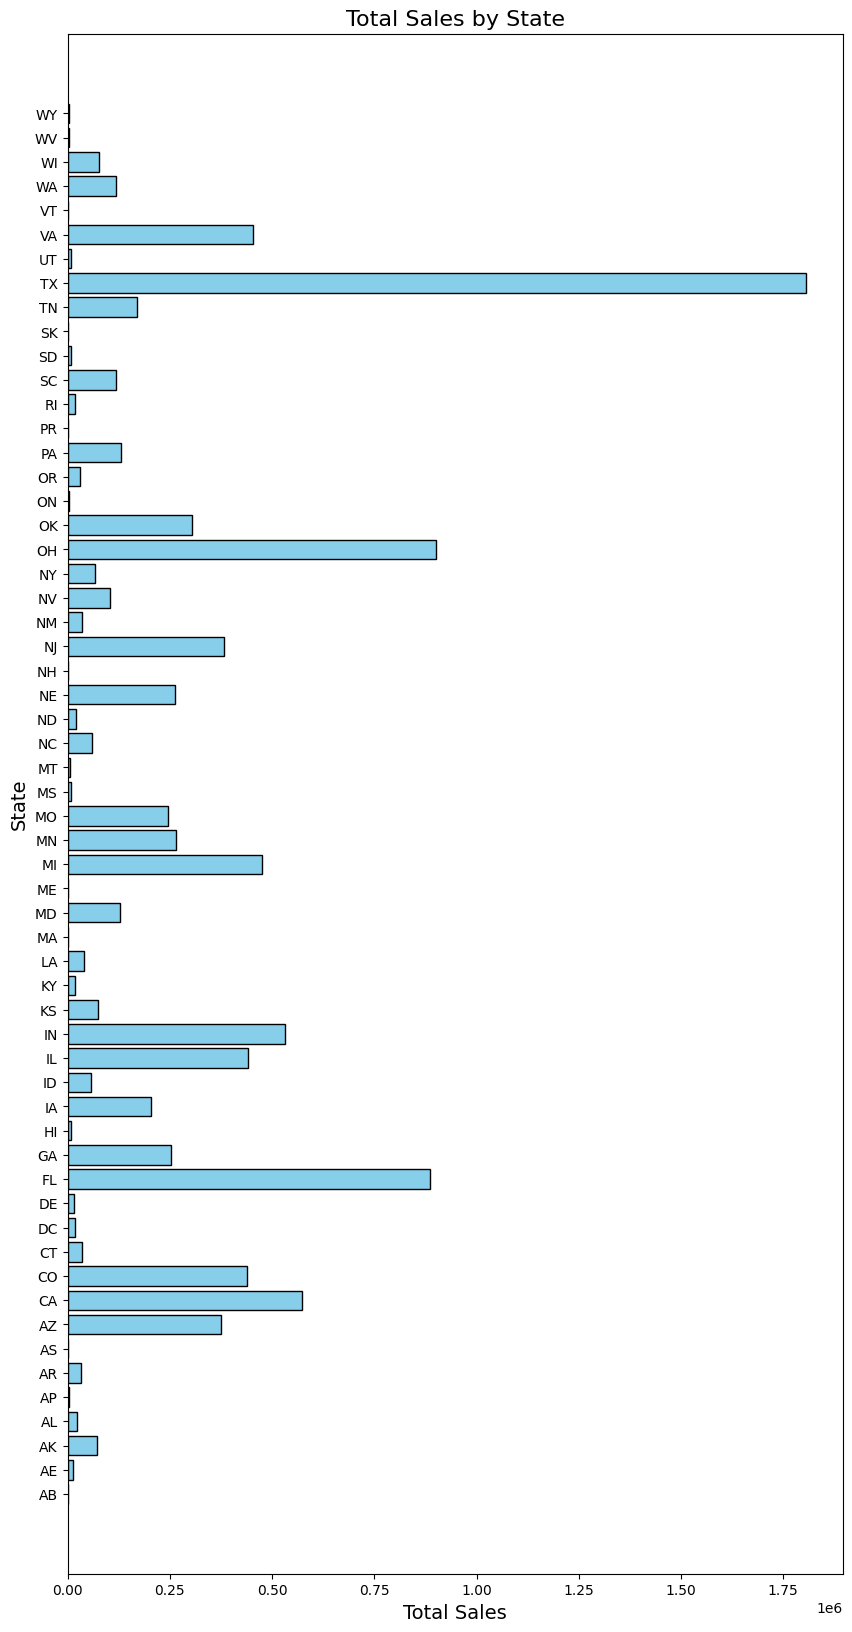

In [ ]:
# Calculate total sales per state
state_sales = df.groupby('STATE')['TOTALSALES'].sum().reset_index()

# Rename columns for better readability
state_sales.columns = ['State', 'Total Sales']

# Plot the horizontal bar chart
plt.figure(figsize=(10, 20))
plt.barh(state_sales['State'], state_sales['Total Sales'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('State', fontsize=14)

# Show the plot
plt.show()

**5.Occupation Distribution**

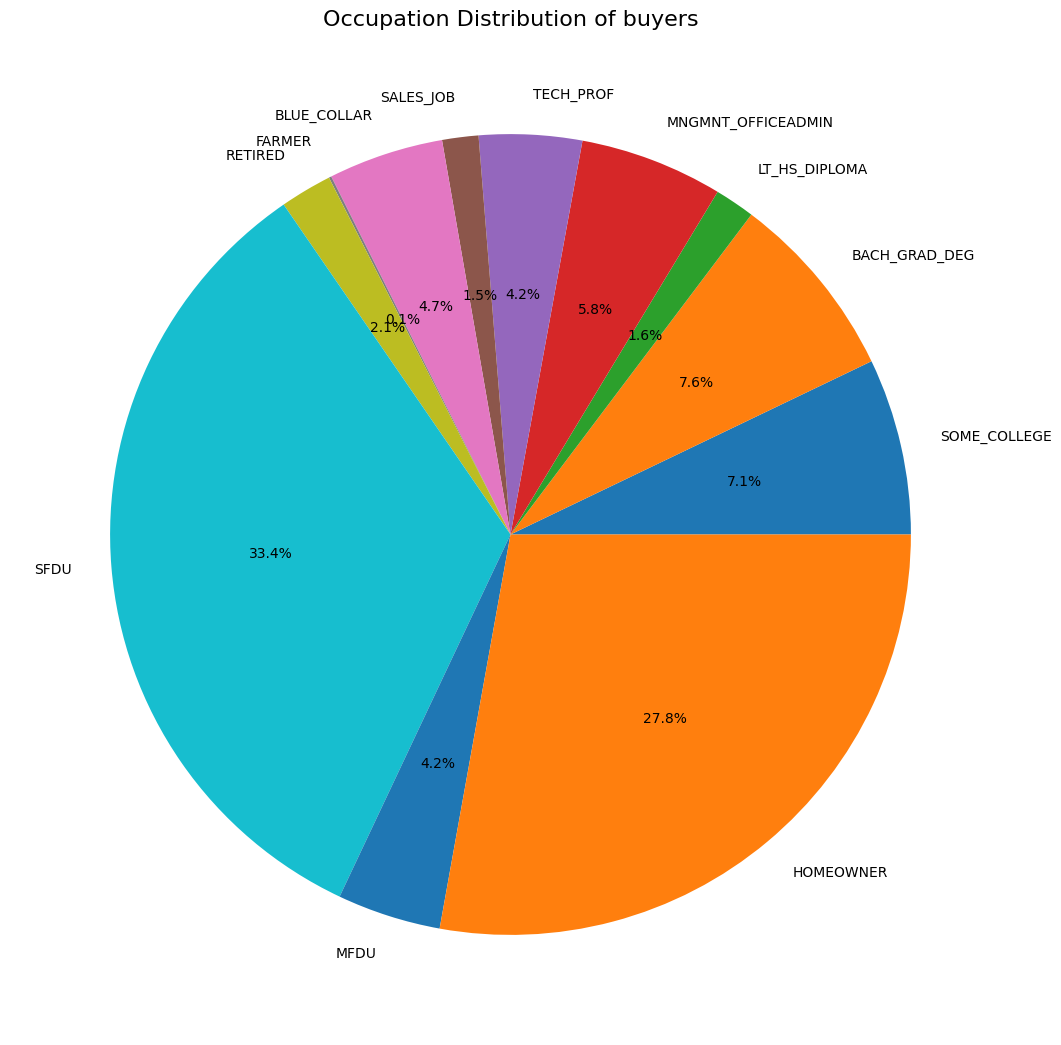

In [ ]:
# Select specific columns using iloc (e.g., columns 0 to 3)
selected_columns = df.iloc[:, 9:21]

# Count the occurrences of `1` in each selected column
column_counts = selected_columns.sum()

# Plot the pie chart
plt.figure(figsize=(13, 13))
plt.pie(
    column_counts,
    labels=column_counts.index,
    autopct='%1.1f%%'

)

# Add a title
plt.title('Occupation Distribution of buyers', fontsize=16)

# Show the chart
plt.show()

**6.Average Close Distance to Store by State**

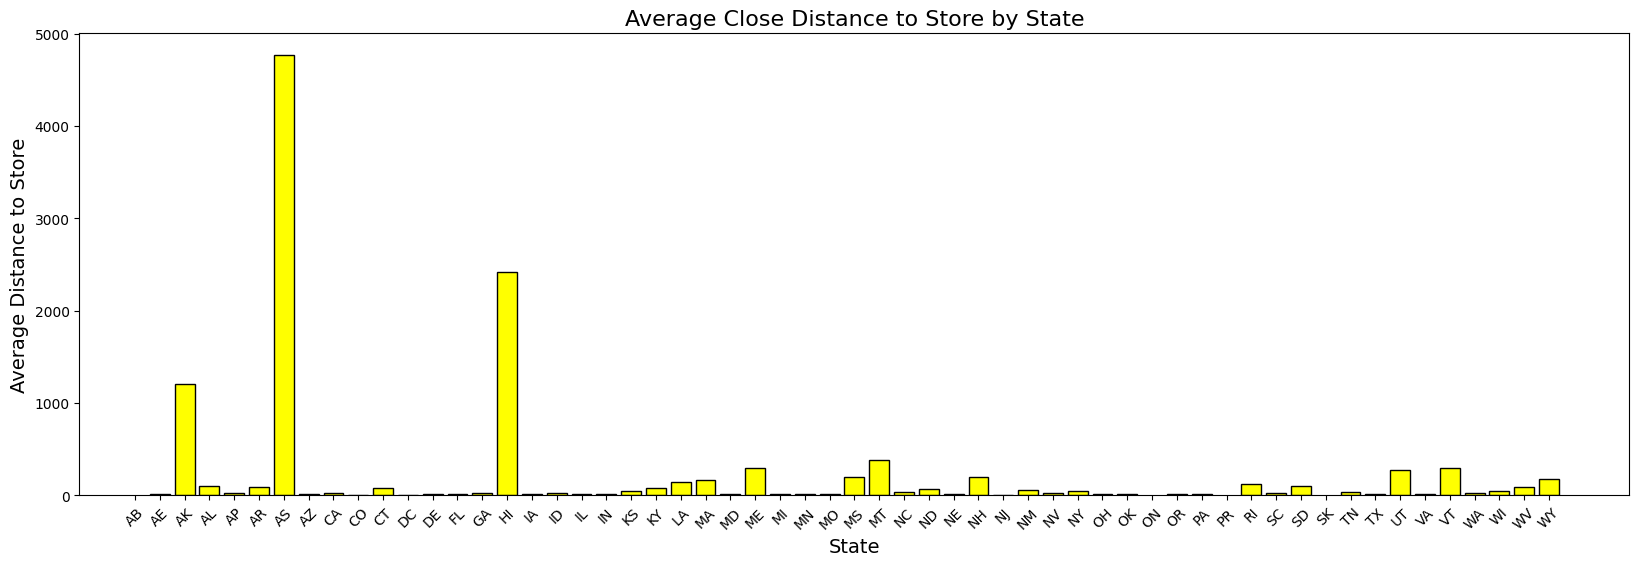

In [ ]:

# Calculate average distance to store by state
state_avg_distance = df.groupby('STATE')['CLOSESTSTOREDISTANCE'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(20, 6))
plt.bar(state_avg_distance['STATE'], state_avg_distance['CLOSESTSTOREDISTANCE'], color='yellow', edgecolor='black')

# Add labels and title
plt.title('Average Close Distance to Store by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Distance to Store', fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()

SOME_COLLEGE          1338
BACH_GRAD_DEG         1429
LT_HS_DIPLOMA          304
MNGMNT_OFFICEADMIN    1085
TECH_PROF              780
SALES_JOB              275
BLUE_COLLAR            874
FARMER                  19
RETIRED                394
SFDU                  6274
MFDU                   786
HOMEOWNER             5229
dtype: int64


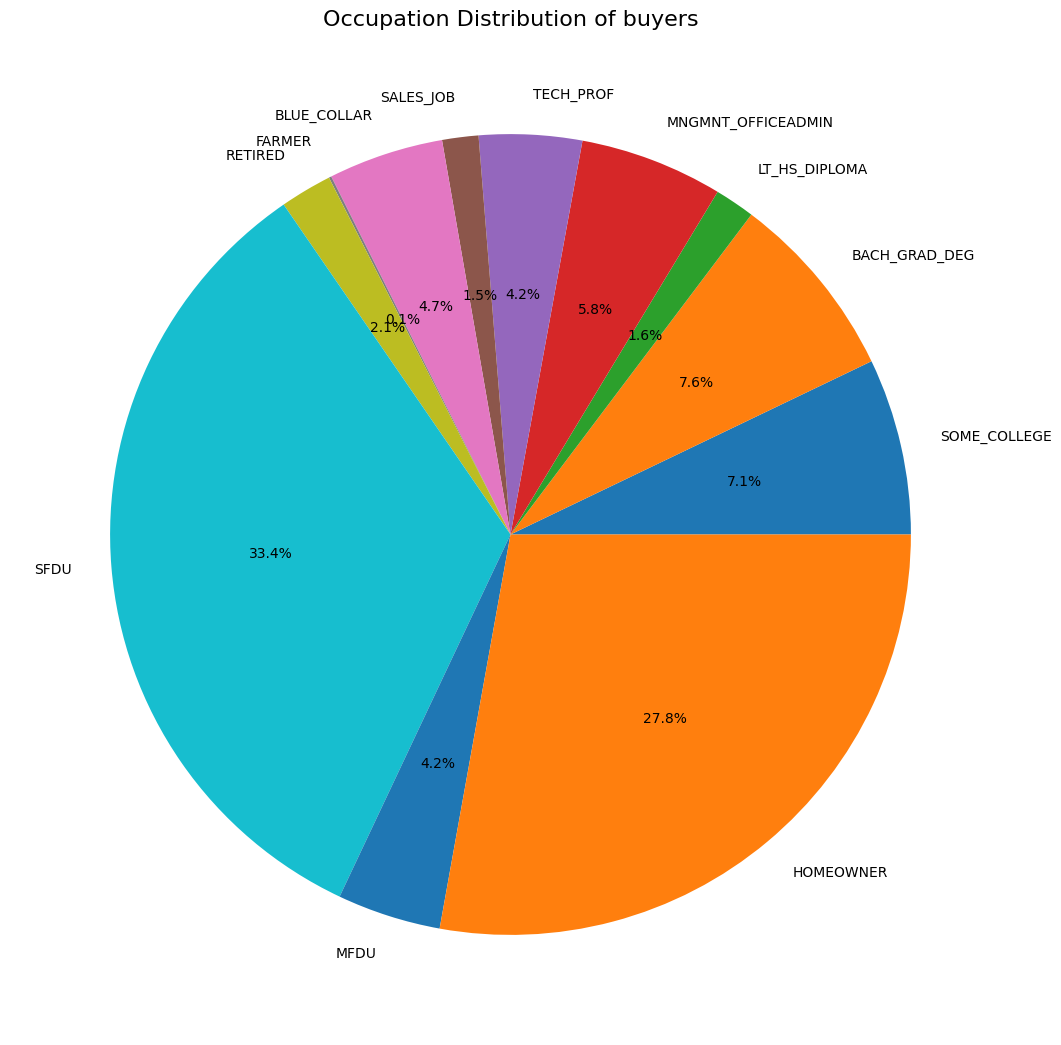

In [ ]:
# Select specific columns using iloc (e.g., columns 0 to 3)
selected_columns = df.iloc[:, 9:21]

# Count the occurrences of `1` in each selected column
column_counts = selected_columns.sum()

# Plot the pie chart
plt.figure(figsize=(13, 13))
plt.pie(
    column_counts,
    labels=column_counts.index,
    autopct='%1.1f%%'

)
print(column_counts)
# Add a title
plt.title('Occupation Distribution of buyers', fontsize=16)

# Show the chart
plt.show()